In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('../data/cleaned_data.csv')
df.head()

,round_winner,player_1_team_name,player_1_name,player_1_team_num,player_1_kills_total,player_1_deaths_total,player_1_has_defuser,player_1_has_helmet,player_1_armor_value,player_1_current_equip_value,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,1,G2 Esports,NiKo,0,1,1,0,0,0.0,700.0,...,0,0,0,0,1,0,1,1,0,0
1,1,G2 Esports,NiKo,0,1,2,0,1,100.0,4100.0,...,0,0,0,0,1,1,1,1,0,0
2,0,G2 Esports,NiKo,0,1,3,0,1,100.0,5100.0,...,0,0,0,0,1,1,0,1,0,0
3,1,G2 Esports,NiKo,0,3,4,0,1,100.0,2800.0,...,0,0,0,0,1,1,0,1,0,0
4,1,G2 Esports,NiKo,0,4,5,0,0,0.0,200.0,...,0,0,0,0,1,1,1,1,0,0


In [14]:
df = df.drop(columns=[f'player_{i}_{suffix}' for i in range(1, 11) for suffix in ['team_name', 'name']])
df.head()

,round_winner,player_1_team_num,player_1_kills_total,player_1_deaths_total,player_1_has_defuser,player_1_has_helmet,player_1_armor_value,player_1_current_equip_value,player_1_balance,player_1_AK-47,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,1,0,1,1,0,0,0.0,700.0,1650,0,...,0,0,0,0,1,0,1,1,0,0
1,1,0,1,2,0,1,100.0,4100.0,150,0,...,0,0,0,0,1,1,1,1,0,0
2,0,0,1,3,0,1,100.0,5100.0,1000,1,...,0,0,0,0,1,1,0,1,0,0
3,1,0,3,4,0,1,100.0,2800.0,400,0,...,0,0,0,0,1,1,0,1,0,0
4,1,0,4,5,0,0,0.0,200.0,3100,0,...,0,0,0,0,1,1,1,1,0,0


In [15]:
def sigmoid(z):
    """Numerically stable sigmoid function."""
    z = np.clip(z, -500, 500)  # Limit z to avoid overflow
    return np.where(z >= 0,
                    1 / (1 + np.exp(-z)),
                    np.exp(z) / (1 + np.exp(z)))

In [6]:
def cross_entropy(y, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [7]:
def compute_gradients(X, y, y_pred):
    diff = y_pred - y
    return np.dot(X.T, diff) / len(y)

In [8]:
def standardize_features(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [9]:
def initialize_weights(size):
    std_dev = np.sqrt(2 / (size + 1))
    return np.random.randn(size) * std_dev

In [10]:
def logistic_regression(X, y, lr, epochs, e=1e-6):
    w = initialize_weights(X.shape[1])
    losses = []
    for epoch in range(epochs):
        z = np.dot(X, w)
        y_pred = sigmoid(z)
        loss = cross_entropy(y, y_pred)
        gradients = compute_gradients(X, y, y_pred)
        w -= lr * gradients
        new_loss = cross_entropy(y, sigmoid(np.dot(X, w)))
        losses.append(new_loss)
        if epoch % 250 == 0:
            print(f'Epoch {epoch}, loss {loss}')
        if np.abs(new_loss - loss) < e:
            print(np.abs(new_loss - loss))
            print(f'Converged at epoch {epoch}')
            break
    return w, losses

In [12]:
def predict(X, w, threshold=0.5):
    z = np.dot(X, w)
    probabilities = sigmoid(z)
    return (probabilities >= threshold).astype(int)

In [23]:
X = df.drop(['round_winner'], axis=1)
X.head()

,player_1_team_num,player_1_kills_total,player_1_deaths_total,player_1_has_defuser,player_1_has_helmet,player_1_armor_value,player_1_current_equip_value,player_1_balance,player_1_AK-47,player_1_M4A1-S,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,0,1,1,0,0,0.0,700.0,1650,0,0,...,0,0,0,0,1,0,1,1,0,0
1,0,1,2,0,1,100.0,4100.0,150,0,0,...,0,0,0,0,1,1,1,1,0,0
2,0,1,3,0,1,100.0,5100.0,1000,1,0,...,0,0,0,0,1,1,0,1,0,0
3,0,3,4,0,1,100.0,2800.0,400,0,0,...,0,0,0,0,1,1,0,1,0,0
4,0,4,5,0,0,0.0,200.0,3100,0,0,...,0,0,0,0,1,1,1,1,0,0


In [24]:
y = df['round_winner']

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
X[1]

array([-1.00731919, -1.12162278, -1.0350197 , -0.47218367,  0.70523629,
        0.44101887, -0.09409249, -0.74819381, -0.67847101, -0.46920065,
       -0.17831466, -0.35844693,  0.        , -0.03431587, -0.11965113,
        4.15266603, -0.0153393 ,  0.        , -0.03068943, -0.04342187,
        0.        , -0.13760728, -0.0216956 , -0.20221593,  0.        ,
        0.        ,  0.        , -0.0216956 , -0.03068943,  0.        ,
        0.        , -0.22509404, -0.75561461,  1.26869083, -0.17189272,
       -0.18522033, -0.23916459, -0.04606127, -0.26756424,  0.        ,
       -0.13032899,  0.52006942, -1.02742848,  0.66924456, -0.66298793,
        1.39643643, -0.04061265,  1.03617495, -0.56091139, -1.25626983,
       -0.45495568,  0.68032015,  0.44547138, -0.0684089 , -0.78392704,
       -0.68735927, -0.48554692, -0.15836152, -0.31195422, -0.0153393 ,
       -0.0153393 , -0.10573471, -0.25102939,  0.        ,  0.        ,
        0.        , -0.0265747 ,  0.        , -0.16298353, -0.03

In [27]:
lr = 0.1
epochs = 10000

In [28]:
w, losses = logistic_regression(X, y, lr, epochs)

Epoch 0, loss 0.8525321420271715
Epoch 250, loss 0.4819324494470472
Epoch 500, loss 0.47908018994311197
Epoch 750, loss 0.4781233572895349
Epoch 1000, loss 0.4776291398522812
9.994387689116202e-07
Converged at epoch 1238


In [29]:
print(f"Weights: {w}")

Weights: [ 1.00534861e-01  1.51881989e-01  1.12387268e-01  2.26835679e-01
  1.16454079e-01  3.93160570e-02 -1.05121502e-02  4.95825584e-02
 -1.06053522e-03 -8.19612150e-02 -1.50114480e-02 -1.53766918e-01
  6.43002452e-02 -5.48300405e-02 -1.62078266e-02 -6.62690806e-02
  4.89831437e-02 -5.29799623e-02 -1.07340455e-01  7.56311367e-02
  3.20397455e-02  3.07264583e-02 -1.30811130e-01  6.28394249e-02
  1.27773450e-05 -2.35003235e-02 -2.63017136e-03 -9.31299556e-02
  3.58404537e-02 -4.86400113e-02 -8.88746745e-03 -2.86350180e-02
  7.71915537e-02  8.71543065e-02  1.90351412e-02 -6.28382055e-02
 -2.70632556e-02 -7.11369025e-02  3.27122376e-02 -4.73226565e-03
  1.53720466e-02 -8.80987615e-02 -8.11363553e-02  5.96784249e-02
  1.20657917e-01 -1.40902440e-01 -3.85696496e-02  2.94991366e-03
 -8.64184579e-02 -7.60239792e-02  1.53257913e-01 -7.68425433e-02
 -1.69747281e-03 -5.12077047e-02 -3.91623074e-02 -3.75816717e-02
  6.38541725e-02  3.29497134e-02 -3.17950358e-02  8.17081423e-02
 -4.35653656e-02

Text(0, 0.5, 'Loss')

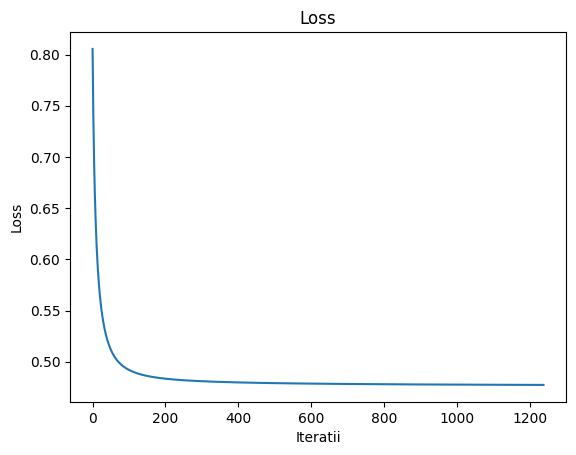

In [30]:
plt.title("Loss")
plt.plot(losses)
plt.xlabel("Iteratii")
plt.ylabel("Loss")

In [31]:
y_pred = predict(X, w)

In [32]:
print(classification_report(y, y_pred))
confusion_matrix = metrics.confusion_matrix(y, y_pred)
conf_matrix_df = pd.DataFrame(confusion_matrix, index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2114
           1       0.77      0.81      0.79      2137

    accuracy                           0.78      4251
   macro avg       0.78      0.78      0.78      4251
weighted avg       0.78      0.78      0.78      4251

                 Predicted Negative  Predicted Positive
Actual Negative                1590                 524
Actual Positive                 411                1726


The accuracy of 78% provides a general sense of how often the model is correct but does not distinguish between the types of errors (false positives vs. false negatives).

The precision of 79% is decent, suggesting that when a positive class is predicted, it’s likely to be correct more than two-thirds of the time. However, about 29% of your positive predictions are false positives.

The recall of 75% is relatively high, which is good if it's critical not to miss any true positives. However, you're still missing about 23% of actual positives, which could be critical depending on the application.